In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from unet import UNet
from unet import MultiResUnet
from PIL import Image
import numpy as np
import os,sys
from utils.data_loading import BasicDataset
from unet import UNet
from utils.utils import plot_img_and_mask

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = UNet(n_channels=1, n_classes=2)
net = net.to(device)
net2 = MultiResUnet(input_channels=1, num_classes=2)
net2 = net2.to(device)

net.load_state_dict(torch.load(os.path.join("checkpoint_original","unet_12_1.78e-01.pth")))
net2.load_state_dict(torch.load(os.path.join("checkpoint_original","multires_11_2.98e-01.pth")))

<All keys matched successfully>

In [45]:
def get_pred(model,image,scale_factor = 0.25):
    model.eval()
    img = torch.from_numpy(BasicDataset.preprocess(None, image, scale_factor, is_mask=False))
    img = img.unsqueeze(0)
    img = img.to(device=device, dtype=torch.float32)
    with torch.no_grad():
        output = model(img).cpu()
        mask = torch.sigmoid(output) > 0.5
    # print(img.shape,mask.shape,output.shape)
    return mask[0].long().squeeze().numpy()



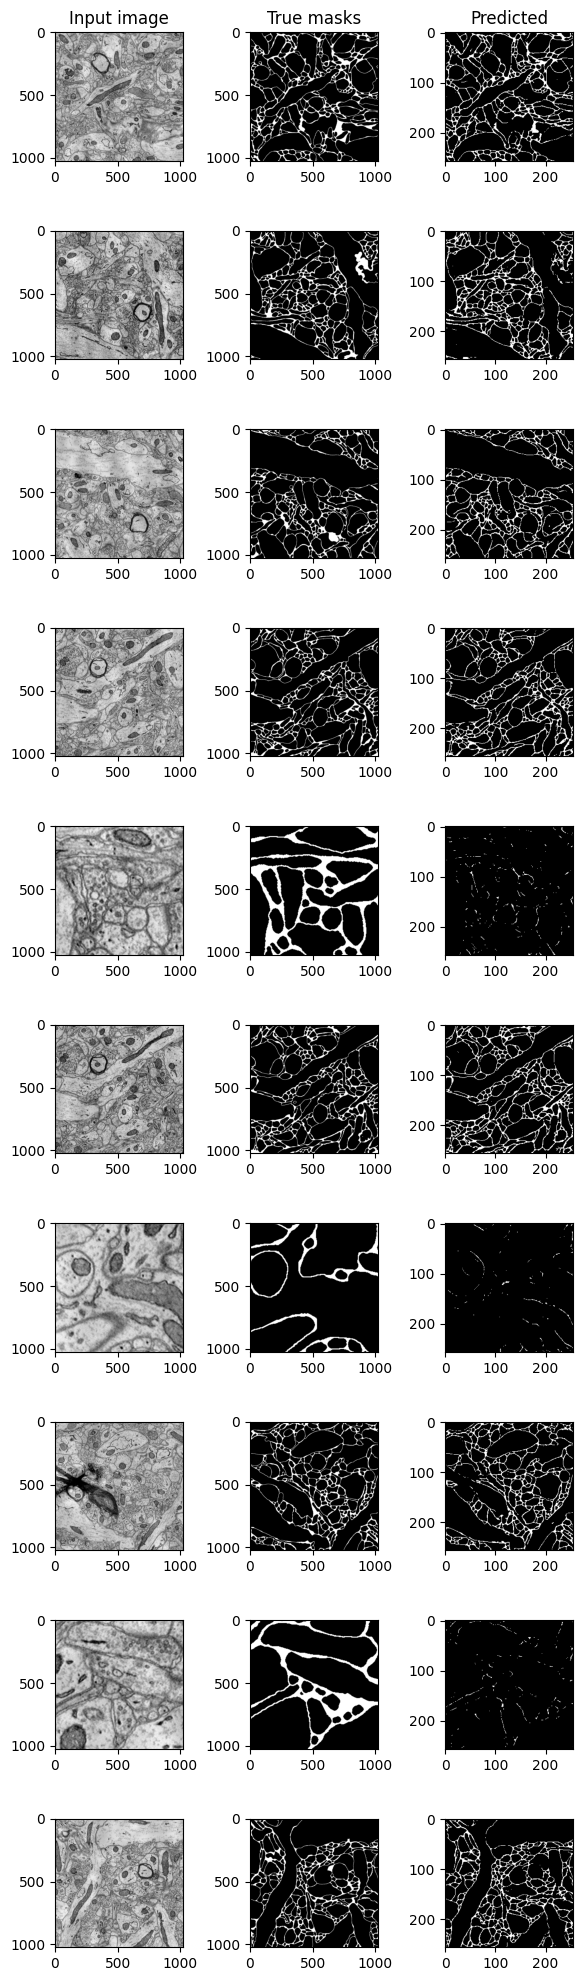

In [60]:
# plot_img_and_mask(image,output)
# output.shape
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10,3,figsize=(6,20))
fig.tight_layout()
count = 0
ax[0][0].set_title('Input image')
ax[0][1].set_title('True masks')
ax[0][2].set_title('Predicted')
for fl in os.listdir("data/imgs/"):
    idx = fl.split(".")[0].split("_")[1]
    idx = int(idx)
    # print(idx)
    count +=1
    if(count > 10):
        break
    filename = "data/imgs/{}".format(fl)
    mask_filename = "data/masks/{}".format(fl)

    image = Image.open(filename)
    true_mask = Image.open(mask_filename)
    output = get_pred(net,image)


    # plt.suptitle("UNET Predictions")
    # ax[count-1][0].set_title('Input image')
    ax[count-1][0].imshow(image,cmap=plt.cm.gray)
    
    ax[count-1][1].imshow(true_mask,cmap=plt.cm.gray)
    # ax[count-1][2].set_title('Predicted masks')
    ax[count-1][2].imshow(output[1],cmap=plt.cm.gray)


torch.Size([1, 1, 256, 256]) torch.Size([1, 3, 256, 256]) torch.Size([1, 3, 256, 256])


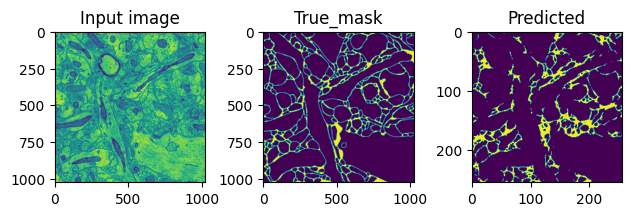

In [38]:
image = Image.open(filename)
true_mask = Image.open(mask_filename)
output = get_pred(net2,image)

fig, ax = plt.subplots(1,3)
fig.tight_layout()
ax[0].set_title('Input image')
ax[0].imshow(image)
ax[1].set_title('True_mask')
ax[1].imshow(true_mask)
ax[2].set_title('Predicted')
ax[2].imshow(output[1])

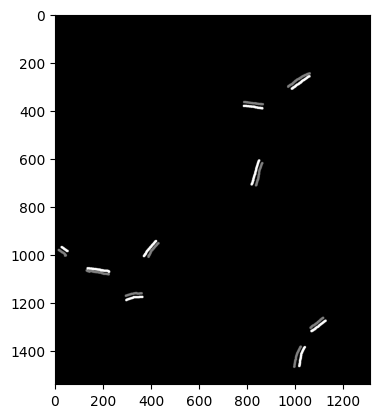

In [63]:
test = Image.open("labels/P14_synGT1.vsseg_export_s2238.png")
plt.imshow(test,cmap=plt.cm.gray)